In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd drive/My Drive/Domaci_4

/content/drive/My Drive/Domaci_4


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [5]:
df = pd.read_csv('data_1.csv',header=None)

In [5]:
df 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,12.07,2.16,2.17,21.0,85,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378,1
126,12.43,1.53,2.29,21.5,86,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352,1
127,11.79,2.13,2.78,28.5,92,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466,1
128,12.37,1.63,2.30,24.5,88,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342,1


In [6]:
#podela dataseta na X i Y
X_dataset=df.iloc[:,:13]
Y_dataset=df.iloc[:,13:]
#standardizacija
X_dataset=np.array(X_dataset)
Y_dataset=np.array(Y_dataset)
srvr = np.zeros(X_dataset.shape[1])
stdev = np.zeros(X_dataset.shape[1])
for i in range(X_dataset.shape[1]):
    srvr[i] = np.mean(X_dataset[:, i])
    stdev[i] = np.std(X_dataset[:, i])

for i in range(X_dataset.shape[1]):
    for j in range(X_dataset.shape[0]):
        X_dataset[j][i] = ((X_dataset[j][i]) - srvr[i]) / stdev[i]

In [7]:
X_dataset.shape

(130, 13)

12


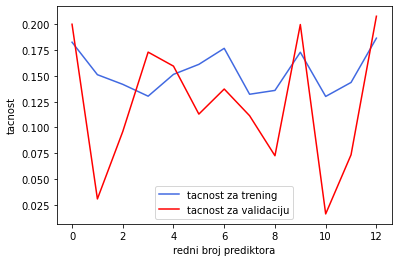

In [8]:
#trazimo najbolji predikor
error_pred_val=np.zeros(X_dataset.shape[1]).reshape(-1,1)
error_pred_tr=np.zeros(X_dataset.shape[1]).reshape(-1,1)
for i in range(X_dataset.shape[1]):
  #svaka odluka postaje zaseban dataset
  X_data=X_dataset[:,int(i)].reshape(-1,1)
  #print("za i", i, X_data)
#kros validacijom cemo da vidimo koja odlika daje najmanju gresku GG?
  valid_split=5
  error_valid=np.zeros(valid_split).reshape(-1,1)
  error_tr=np.zeros(valid_split).reshape(-1,1)
  indices = np.arange(len(X_data))
  folds = np.array_split(indices, indices_or_sections=valid_split)
   
  for k, fold in enumerate(folds):
        valid_X, valid_Y = np.mat(X_data[folds[k]]), np.mat(Y_dataset[folds[k]])
        train_indices = np.concatenate([folds[p] for p in range(len(folds)) if p != k])
        train_X, train_Y = np.mat(X_data[train_indices]), np.mat(Y_dataset[train_indices])
        m,n=train_X.shape
        m_v,n_v=valid_Y.shape
        #dodavanje  jedinica
        train_X_one,valid_X_one=np.ones((m,1)),np.ones((m_v,1))
        train_X,valid_X=np.hstack((train_X_one,train_X)),np.hstack((valid_X_one,valid_X))
        alpha=0.01
        epoha_size=1000  
        theta=np.zeros((train_X.shape[1],1))
        for j in range(epoha_size):
            hipoteza=1./(1+np.exp(-np.dot(train_X,theta)))
            grad=np.zeros((theta.shape[0],1))
            
            for k in range(train_X.shape[1]): 
                grad[k]=(1/train_X.shape[0])*np.sum(np.dot(train_X[:,k].T,(hipoteza-train_Y)))
                
            grad=np.dot(alpha,grad)
            theta=theta-grad 

        prediction_tr=1./(1+np.exp(-np.dot(train_X,theta))) 
        prediction_var=1./(1+np.exp(-np.dot(valid_X,theta)))
        #error_valid[k] = tacnost(valid_X,valid_Y, prediction_var)/valid_X.shape[0]
        #error_tr[k]=tacnost(train_X,train_Y, prediction_tr)/valid_X.shape[0]
        # računanje tačnosti nad trening i vaidacionim skupom
        klasifikacija=np.zeros((prediction_tr.shape[0],1))
        klasifikacija[np.where(prediction_tr>0.5)]=1
    #     print(klasifikacija)
        for a in range(0,klasifikacija.shape[0]):
            if(klasifikacija[a]==train_Y[a]):
                error_tr[k,0]=error_tr[k,0]+1
                
        error_tr[k,0]=error_tr[k,0]/train_Y.shape[0]
        
        klasifikacija_val=np.zeros((prediction_var.shape[0],1))
        klasifikacija_val[np.where(prediction_var>0.5)]=1
        for b in range(0,klasifikacija_val.shape[0]):
            if(klasifikacija_val[b]==valid_Y[b]):
                error_valid[k,0]=error_valid[k,0]+1
                
        error_valid[k,0]=error_valid[k,0]/valid_Y.shape[0]

  error_pred_val[i]=np.mean(error_valid)
  error_pred_tr[i]=np.mean(error_tr)

plt.plot(error_pred_tr,color="royalblue")
plt.plot(error_pred_val,color="red")
plt.ylabel("tacnost")
plt.xlabel("redni broj prediktora")
plt.legend(['tacnost za trening','tacnost za validaciju'])

print(np.argmax(error_pred_val))
indmax=np.argmax(error_pred_val)

In [9]:
indmax=np.argmax(error_pred_val)
#znamo ko je najblji predikotr sad dodajemo jednaj po jedna od ostalih da vidimo koji par je najbolji, i to ponavljamo 

In [10]:
print(indmax)

12


In [11]:
niz=np.arange(12,0,-1) # prolazak kroz novonapravljenu matricu Xnew sve dok se ne isprazni
X_new=X_dataset[:,indmax].reshape(-1,1)#novi data set sa predikotima od najveceg ka najmanjem tj naboljem
X_old=np.delete(X_dataset,indmax,1)#stari dataset bez najboljeg predikotra
# formiranje niza u kojem se čuvaju indexi prediktora onim redosledom kojim su 'ulazili' u omotač, od najboljeg pa nadalje
niz_kon=[]
niz_kon.append(indmax)
#br_niz=1 # brojač za niz

for w in niz:
    br=0
    error_pred=np.zeros((w,1))
    error_pred_val=np.zeros((w,1))
    for i in range(X_old.shape[1]):
        pom=X_old[:,int(i)].reshape(-1,1)
        X_data=np.hstack((X_new,pom))

        
        
        #kros validaciju
        valid_split=5
        s=0
        error_valid=np.zeros(valid_split).reshape(-1,1)
        error_tr=np.zeros(valid_split).reshape(-1,1)
        indices = np.arange(len(X_data))
        folds = np.array_split(indices, indices_or_sections=valid_split)
        for k, fold in enumerate(folds):
            
            valid_X, valid_Y = np.mat(X_data[folds[k]]), np.mat(Y_dataset[folds[k]])
            train_indices = np.concatenate([folds[p] for p in range(len(folds)) if p != k])
            train_X, train_Y = np.mat(X_data[train_indices]), np.mat(Y_dataset[train_indices])
            m,n=train_X.shape
            m_v,n_v=valid_Y.shape
            # inicijaliyovanje potrebnih parmetara
            alpha=0.01
            epoha=1000  
            theta=np.zeros((train_X.shape[1],1))

           # računanje gradijentnog pomeraja i ažuriranje parametara theta 
            for j in range(epoha):
                hipoteza=1./(1+np.exp(-np.dot(train_X,theta)))
                grad=np.zeros((theta.shape[0],1))
            
                for k in range(train_X.shape[1]): 
                    grad[k]=(1/train_X.shape[0])*np.sum(np.dot(train_X[:,k].T,(hipoteza-train_Y)))
                
                grad=np.dot(alpha,grad)
                theta=theta-grad 
                

            #izračunavanje vektora predikcije za trening i za validacioni skup podataka
            predikcija_tr=1./(1+np.exp(-np.dot(train_X,theta)))  #namestene su tete 
            predikcija_val=1./(1+np.exp(-np.dot(valid_X,theta)))

            # računanje tačnosti nad trening i vaidacionim skupo
            klasifikacija=np.zeros((predikcija_tr.shape[0],1))
            klasifikacija[np.where(predikcija_tr>0.5)]=1
        #     print(klasifikacija)
            #print(k)
            suma=0
            for a in range(0,klasifikacija.shape[0]):
                if(klasifikacija[a]==train_Y[a]):
                     error_tr[s,0]=error_tr[s,0] + 1

            
            error_tr[s,0]=error_tr[s,0]/m
            
            klasifikacija=np.zeros((predikcija_val.shape[0],1))
            klasifikacija[np.where(predikcija_val>0.5)]=1
        #     print(klasifikacija)
            suma=0
            for a in range(0,klasifikacija.shape[0]):
                if(klasifikacija[a]==valid_Y[a]):
                     error_valid[s,0]=error_valid[s,0] + 1

            error_valid[s,0]=error_valid[s,0]/m_v
            
            s=+1
        

        error_pred[br,0]=np.mean(error_tr)
    
        error_pred_val[br,0]=np.mean(error_valid)
        
        br+=1
    
    new_ind=np.argmax(error_pred_val)
    
    # pamćenje indexa prediktora...
    
    for c in range(X_dataset.shape[1]):
        #print(c)
        pom=X_dataset[:,c].reshape(-1,1)
        pom2=X_old[:,new_ind].reshape(-1,1)
        if np.array_equiv(pom,pom2):
            niz_kon.append(c)
            
 
    X_new=np.hstack([X_new,X_old[:,new_ind].reshape(-1,1)])  # šta se trenutno nalazi u omotaču od prediktora
    X_old=np.delete(X_old,new_ind,1)  # šta je preostalo od prediktora da se 'izabere' za omotač
print(niz_kon)#nasli mso redosled dodavanja

[12, 0, 11, 5, 2, 3, 1, 9, 8, 7, 10, 4, 6]


2


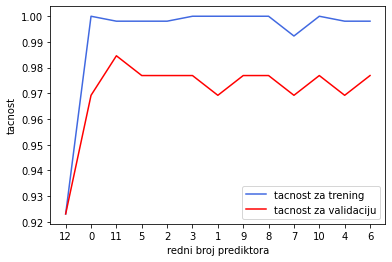

In [14]:
#treba da vidimo kada da stanemo sa dodavanjem predikora
from sklearn.model_selection import StratifiedKFold
tacnostuk=np.zeros((13,1))
tacnostuk_val=np.zeros((13,1))

skf = StratifiedKFold(n_splits=5,random_state=None,shuffle=False)

pom= X_dataset[:,12].reshape(-1,1) # započinjem sa jednim, najboljim prediktorom

br1=0

for i in range(0,13):
    if i==0:
        pompom=np.hstack([pom,X_dataset[:,int(niz[i])].reshape(-1,1)])
    else:
        pom1=X_dataset[:,int(i)].reshape(-1,1)
        pompom=np.hstack((X_data,pom1))

    br=0;
    
    tacnost=np.zeros((5,1))
    tacnost_val=np.zeros((5,1))
    
    # unakrsna validacija
    for train_index,test_index in skf.split(pompom,Y_dataset):   
    
        X_train2,X_val = pompom[train_index], pompom[test_index]
        y_train2,y_val = Y_dataset[train_index], Y_dataset[test_index]

        #dodavanje jedinica
        X_train2 = np.hstack([np.ones((X_train2.shape[0],1)),X_train2])
        X_val = np.hstack([np.ones((X_val.shape[0],1)),X_val])


        # inicijaliyovanje potrebnih parmetara
        alpha=0.01
        ithers=1000  
        theta=np.zeros((X_train2.shape[1],1))

        # računanje gradijentnog pomeraja i ažuriranje parametara theta 
        for j in range(0,ithers):
            hipoteza=1./(1+np.exp(-np.dot(X_train2,theta)))
            grad=np.zeros((theta.shape[0],1))
            
            for k in range(X_train2.shape[1]): 
                grad[k]=(1/X_train2.shape[0])*np.sum(np.dot(X_train2[:,k].T,(hipoteza-y_train2)))
                
            grad=np.dot(alpha,grad)
            theta=theta-grad 
            
            
        #izračunavanje vektora predikcije za trening i za validacioni skup podataka
        predikcija_tr=1./(1+np.exp(-np.dot(X_train2,theta)))  #namestene su tete 
        predikcija_val=1./(1+np.exp(-np.dot(X_val,theta)))
        
        # računanje tačnosti nad trening i vaidacionim skupom
        klasifikacija=np.zeros((predikcija_tr.shape[0],1))
        klasifikacija[np.where(predikcija_tr>0.5)]=1
    #     print(klasifikacija)
        for a in range(0,klasifikacija.shape[0]):
            if(klasifikacija[a]==y_train2[a]):
                tacnost[br,0]=tacnost[br,0]+1
                
        tacnost[br,0]=tacnost[br,0]/y_train2.shape[0]
        
        klasifikacija_val=np.zeros((predikcija_val.shape[0],1))
        klasifikacija_val[np.where(predikcija_val>0.5)]=1
        for b in range(0,klasifikacija_val.shape[0]):
            if(klasifikacija_val[b]==y_val[b]):
                tacnost_val[br,0]=tacnost_val[br,0]+1
                
        tacnost_val[br,0]=tacnost_val[br,0]/y_val.shape[0]

        br+=1
        
    tacnostuk[br1,0]=np.mean(tacnost)
    
    tacnostuk_val[br1,0]=np.mean(tacnost_val)

    br1+=1
    
# iscrtavanje tačnosti za trening i validacioni skup podataka
x=np.arange(13)
xmenjaj = ["12","0","11","5","2","3","1","9","8","7","10","4","6"]

plt.plot(tacnostuk,color="royalblue")
plt.plot(tacnostuk_val,color="red")
plt.xticks(x,xmenjaj)
plt.ylabel("tacnost")
plt.xlabel("redni broj prediktora")
plt.legend(['tacnost za trening','tacnost za validaciju'])

print(np.argmax(tacnostuk_val))#argmax broji od 0